<a href="https://colab.research.google.com/github/guyb2022/ML_DS_Training/blob/main/digits_as_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks (CNN)
<font color='blue'>
<br>Content: 
* [Loading the Data Set](#1)
* [Normalization, Reshape and Label Encoding ](#2)
* [Train Test Split](#3)
* [Convolutional Neural Network](#4)
    * [What is Convolution Operation?](#5)
    * [Same Padding](#6)
    * [Max Pooling](#7)
    * [Flattening](#8)
    * [Full Connection](#9)
* [Implementing with Keras](#10)
    * [Create Model](#11)
    * [Define Optimizer](#12)
    * [Compile Model](#13)
    * [Epochs and Batch Size](#14)
    * [Data Augmentation](#15)
    * [Fit the Model](#16)
    * [Evaluate the Model](#17)
* [Deep Learning Tutorial for Beginners](https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners)
* [Artificial Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)
* [Convolutional Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)
* [Recurrent Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch)
* [Conclusion](#18)


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
import tensorflow as tf
from tensorflow import keras
from keras import layers
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="1"></a>
## Loading the Data Set
* In this part we load and visualize the data.

In [ ]:
# read train 
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/digits/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
# read test 
test= pd.read_csv("/content/drive/My Drive/Colab Notebooks/digits/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# put labels into y_train variable
y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

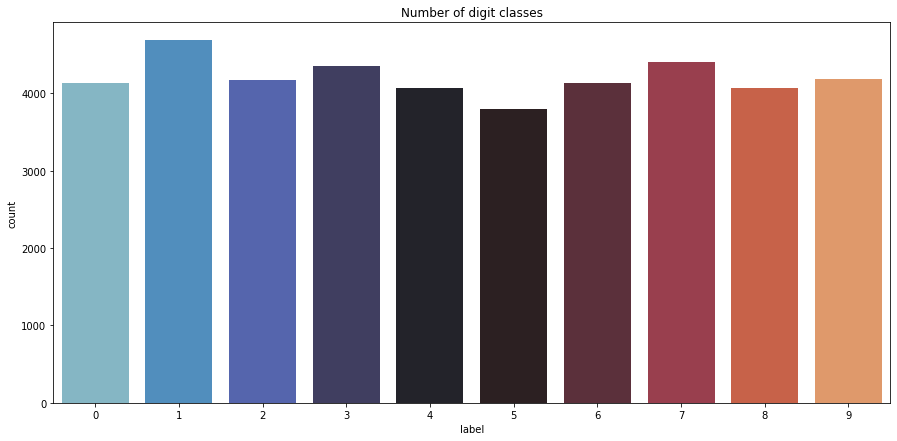

In [ ]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")
y_train.value_counts()

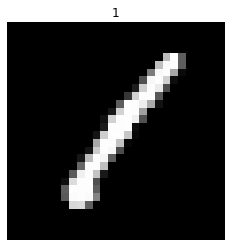

In [ ]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

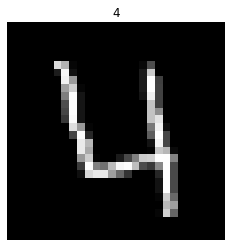

In [ ]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

<a id="2"></a>
## Normalization, Reshape and Label Encoding 
* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 
* Label Encoding  
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [ ]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [ ]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)

<a id="3"></a>
## Train Test Split
* We split the data into train and test sets.
* test size is 10%.
* train size is 90%.

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


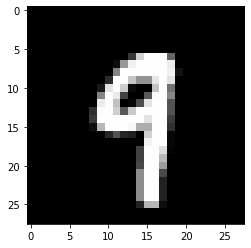

In [ ]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

<a id="10"></a>
## Implementing with TensorFlow and CNN

In [ ]:
# Building the model
conv_model = tf.keras.models.Sequential([
                                        layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
                                        layers.MaxPooling2D(pool_size=(2, 2)),
                                        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                                        layers.MaxPooling2D(pool_size=(2, 2)),
                                        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
                                        layers.MaxPooling2D(pool_size=(2, 2)),
                                        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                                        layers.MaxPooling2D(pool_size=(2, 2)),
                                        layers.Flatten(),
                                        layers.Dense(512, activation='relu'),
                                        layers.Dense(256, activation='relu'),
                                        layers.Dense(10, activation='softmax')
])

In [ ]:
conv_model.compile(optimizer='adam',
                   loss='binar_crossentropy',
                   metrics=['accuracy'])
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 32)        

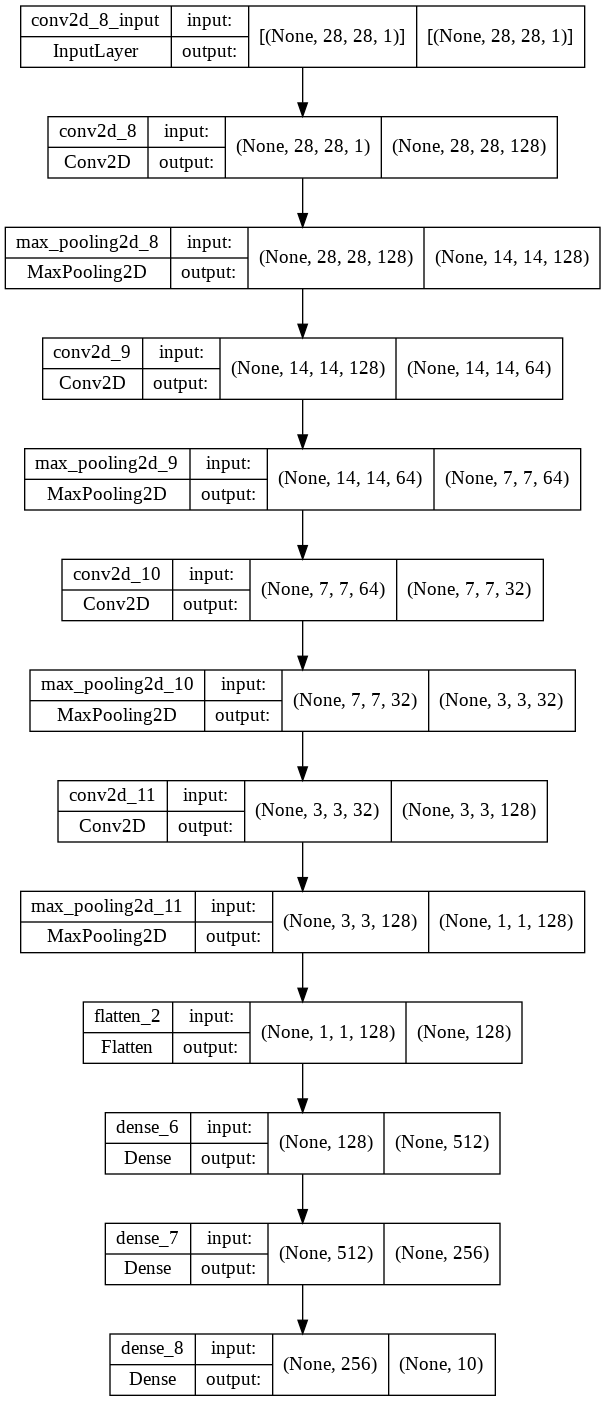

In [ ]:
keras.utils.plot_model(conv_model, 'model_image_classification_shapes.png', show_shapes=True)

In [ ]:
training_hist = conv_model.fit(X_train,
                               y_train,
                               epochs=5,
                               batch_size=32,
                               validation_data=(X_val,y_val)
                               )

Epoch 1/5
1182/1182 [==============================] - 161s 136ms/step - loss: 0.0567 - accuracy: 0.8827 - val_loss: 0.0141 - val_accuracy: 0.9810
Epoch 2/5
1182/1182 [==============================] - 157s 133ms/step - loss: 0.0121 - accuracy: 0.9802 - val_loss: 0.0120 - val_accuracy: 0.9810
Epoch 3/5
1182/1182 [==============================] - 155s 131ms/step - loss: 0.0097 - accuracy: 0.9848 - val_loss: 0.0168 - val_accuracy: 0.9729
Epoch 4/5
1182/1182 [==============================] - 157s 133ms/step - loss: 0.0073 - accuracy: 0.9875 - val_loss: 0.0094 - val_accuracy: 0.9833
Epoch 5/5
1182/1182 [==============================] - 156s 132ms/step - loss: 0.0062 - accuracy: 0.9902 - val_loss: 0.0095 - val_accuracy: 0.9867


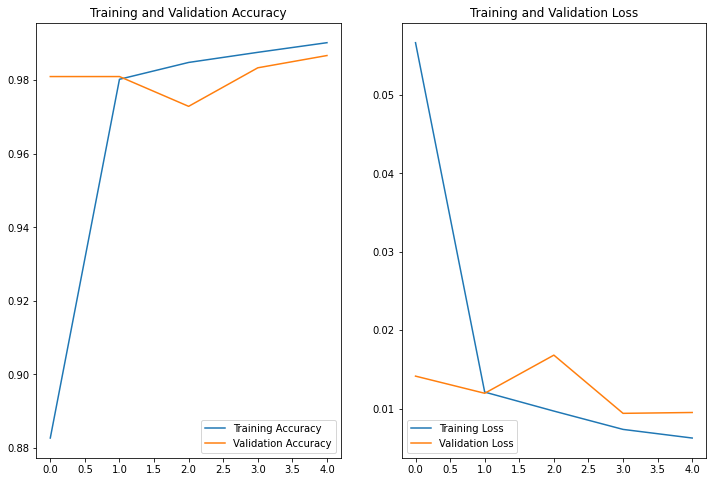

In [ ]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss = training_hist.history['loss']
val_loss = training_hist.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_pred = conv_model.predict(X_val)
model_accuracy = conv_model.evaluate(X_val, y_val)
print(model_accuracy)

132/132 [==============================] - 4s 31ms/step - loss: 0.0095 - accuracy: 0.9867
[0.009502178989350796, 0.9866666793823242]
